In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

### 设置数据根目录

In [2]:
data_root = '../energy_predict_data'  # 改成自己电脑上的路径即可

### 加载完美数据集

In [3]:
perfect_data = pd.read_csv(data_root + '/perfect.csv')
# 获取列名
header = perfect_data.columns.values.tolist()
perfect_data.describe()

,vehicle_id,charge_start_time,charge_end_time,mileage,charge_start_soc,charge_end_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_energy
count,2106.000000,2.106000e+03,2.106000e+03,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,3.543210,2.017804e+13,2.017805e+13,103516.459117,64.027066,87.368946,482.534615,498.785185,-35.776258,-22.966999,30.934948,23.247863,16.938179
std,1.033999,4.030202e+09,4.025264e+09,29040.034683,32.170188,23.183608,94.706814,84.998822,51.151153,45.049156,9.605968,10.123105,21.009682
min,1.000000,2.017110e+13,2.017110e+13,55462.800000,0.800000,8.800000,255.900000,329.000000,-200.000000,-205.000000,-1.000000,-3.000000,0.002000
25%,3.000000,2.017123e+13,2.017123e+13,78807.000000,36.000000,85.000000,364.200000,396.700000,-49.225000,-16.200000,27.000000,17.000000,0.005000
50%,4.000000,2.018031e+13,2.018031e+13,100039.200000,66.000000,100.000000,541.150000,548.000000,-8.750000,-5.000000,32.000000,25.000000,10.464000
75%,4.000000,2.018052e+13,2.018052e+13,120032.175000,100.000000,100.000000,550.775000,559.375000,-2.000000,-2.000000,37.000000,30.000000,26.432500
max,5.000000,2.018071e+13,2.018071e+13,172430.000000,100.000000,100.000000,594.300000,604.800000,-0.200000,8.000000,50.000000,44.000000,100.792000


### 使用完美数据集来聚类

/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


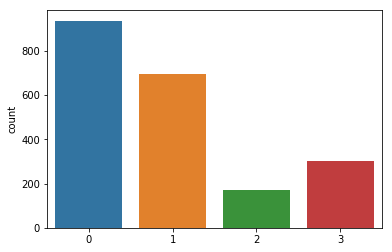

In [4]:
from sklearn.cluster import KMeans
#聚类和填充需要操作的列名
compute_header = ['charge_start_soc','charge_end_soc','charge_start_U','charge_end_U','charge_start_I','charge_end_I','charge_energy']
cluster_source = perfect_data[compute_header]
kmeans = KMeans(n_clusters=4, random_state=0).fit(cluster_source)
cluster = kmeans.cluster_centers_
labels = kmeans.labels_
sns.countplot(labels)

In [5]:
# perfect_data_label = perfect_data
# perfect_data_label['label'] = labels
# df = pd.DataFrame(perfect_data_label, columns=['label'] + header)
# df.describe()

### 加载不完美的数据

In [6]:
imperfect_data = pd.read_csv(data_root + '/perfect_not.csv')
imperfect_data.describe()

,vehicle_id,charge_start_time,charge_end_time,mileage,charge_start_soc,charge_end_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_energy
count,676.000000,6.760000e+02,6.760000e+02,676.000000,650.000000,625.000000,676.000000,663.000000,676.000000,663.000000,676.000000,676.000000,661.000000
mean,4.034024,2.017834e+13,2.017834e+13,95840.486243,46.440923,68.095680,518.426479,425.636953,-81.829290,-15.591101,33.742604,8.303254,41.816927
std,1.170133,3.840565e+09,3.840696e+09,19032.629331,17.721992,40.783064,69.319083,225.572000,64.506177,45.270625,9.655335,13.603640,25.245385
min,1.000000,2.017110e+13,2.017110e+13,56473.900000,0.000000,0.000000,318.100000,0.000000,-202.000000,-300.000000,0.000000,0.000000,0.000000
25%,4.000000,2.018011e+13,2.018011e+13,81364.575000,33.200000,29.000000,533.500000,382.050000,-135.000000,-6.000000,30.000000,0.000000,22.086000
50%,4.000000,2.018031e+13,2.018031e+13,93742.800000,44.500000,89.000000,541.950000,555.000000,-70.500000,-1.000000,34.000000,0.000000,37.246000
75%,5.000000,2.018052e+13,2.018052e+13,112346.125000,60.000000,100.000000,556.225000,567.600000,-20.000000,0.000000,40.000000,16.250000,57.950000
max,5.000000,2.018071e+13,2.018071e+13,153143.000000,100.000000,100.000000,592.900000,602.300000,-1.000000,0.000000,52.000000,44.000000,109.842000


### 提取需要计算的列

In [7]:
tmp_data = imperfect_data[compute_header]
#转化为array
tmp_data = tmp_data.values

### 无论聚类、填充数据只需要计算start_\* , end_\*, energy即可

### 计算欧氏距离

In [8]:
def distance(vectorA=[], vectorB=[]):
    result = 0.0
    for i in range(len(vectorA)):
        x=vectorA[i]
        y=vectorB[i]
        if (not pd.isnull(y))and (y!=0.0):  
            result += (x-y)*(x-y)
    return np.sqrt(result)

### 对不完美数据进行填充

In [9]:
def filling(vectorA=[], vectorB=[]):
    for i in range(len(vectorA)):
        x = vectorA[i]
        y = vectorB[i]
        if pd.isnull(y) or (y==0.0):
            vectorB[i] = x
    return vectorB

In [10]:
for i in range(len(tmp_data)):
    maxD = float('inf')
    maxV = []
    data = tmp_data[i]
    for center in cluster:
        dis = distance(center, data)
        if dis < maxD:
            maxD = dis
            maxV = center
    tmp_data[i] = filling(maxV,data)

In [11]:
#填充结果覆盖到不完美数据集
tmp_data = pd.DataFrame(tmp_data,columns=compute_header)
imperfect_data[compute_header] = tmp_data[compute_header]
imperfect_data.describe()

,vehicle_id,charge_start_time,charge_end_time,mileage,charge_start_soc,charge_end_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_energy
count,676.000000,6.760000e+02,6.760000e+02,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,4.034024,2.017834e+13,2.017834e+13,95840.486243,46.038717,88.301694,518.426479,538.354402,-81.829290,-46.998263,33.742604,8.303254,41.233579
std,1.170133,3.840565e+09,3.840696e+09,19032.629331,17.463824,16.510537,69.319083,64.444939,64.506177,68.060879,9.655335,13.603640,25.249834
min,1.000000,2.017110e+13,2.017110e+13,56473.900000,1.000000,4.000000,318.100000,328.000000,-202.000000,-300.000000,0.000000,0.000000,0.003000
25%,4.000000,2.018011e+13,2.018011e+13,81364.575000,33.768012,83.116279,533.500000,547.675000,-135.000000,-64.650000,30.000000,0.000000,21.338000
50%,4.000000,2.018031e+13,2.018031e+13,93742.800000,44.000000,98.000000,541.950000,563.950000,-70.500000,-7.700000,34.000000,0.000000,36.399000
75%,5.000000,2.018052e+13,2.018052e+13,112346.125000,60.000000,100.000000,556.225000,567.425000,-20.000000,-5.000000,40.000000,16.250000,57.509500
max,5.000000,2.018071e+13,2.018071e+13,153143.000000,100.000000,100.000000,592.900000,602.300000,-1.000000,-1.000000,52.000000,44.000000,109.842000


### 保存数据

In [12]:
to_be_perfect = pd.DataFrame(imperfect_data, columns=header)
to_be_perfect.to_csv(data_root + "/result_perfectNot.csv", index=False)
to_be_perfect.describe()

,vehicle_id,charge_start_time,charge_end_time,mileage,charge_start_soc,charge_end_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_energy
count,676.000000,6.760000e+02,6.760000e+02,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,4.034024,2.017834e+13,2.017834e+13,95840.486243,46.038717,88.301694,518.426479,538.354402,-81.829290,-46.998263,33.742604,8.303254,41.233579
std,1.170133,3.840565e+09,3.840696e+09,19032.629331,17.463824,16.510537,69.319083,64.444939,64.506177,68.060879,9.655335,13.603640,25.249834
min,1.000000,2.017110e+13,2.017110e+13,56473.900000,1.000000,4.000000,318.100000,328.000000,-202.000000,-300.000000,0.000000,0.000000,0.003000
25%,4.000000,2.018011e+13,2.018011e+13,81364.575000,33.768012,83.116279,533.500000,547.675000,-135.000000,-64.650000,30.000000,0.000000,21.338000
50%,4.000000,2.018031e+13,2.018031e+13,93742.800000,44.000000,98.000000,541.950000,563.950000,-70.500000,-7.700000,34.000000,0.000000,36.399000
75%,5.000000,2.018052e+13,2.018052e+13,112346.125000,60.000000,100.000000,556.225000,567.425000,-20.000000,-5.000000,40.000000,16.250000,57.509500
max,5.000000,2.018071e+13,2.018071e+13,153143.000000,100.000000,100.000000,592.900000,602.300000,-1.000000,-1.000000,52.000000,44.000000,109.842000


### 将数据进行整合

In [13]:
perfect_data = perfect_data.append(to_be_perfect, sort=False)
perfect_data.to_csv(data_root + "/perfect_whole.csv", index=False)
perfect_data.describe()

,vehicle_id,charge_start_time,charge_end_time,mileage,charge_start_soc,charge_end_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_energy
count,2782.000000,2.782000e+03,2.782000e+03,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000,2782.000000
mean,3.662473,2.017812e+13,2.017812e+13,101651.269446,59.656065,87.595595,491.256003,508.400135,-46.966715,-28.806372,31.617182,19.616463,22.841734
std,1.089003,3.986307e+09,3.982447e+09,27149.490784,30.280733,21.752122,90.512241,82.248211,58.143551,52.599672,9.691377,12.789921,24.443259
min,1.000000,2.017110e+13,2.017110e+13,55462.800000,0.800000,4.000000,255.900000,328.000000,-202.000000,-300.000000,-1.000000,-3.000000,0.002000
25%,3.000000,2.018010e+13,2.018010e+13,79427.075000,34.000000,84.000000,370.700000,398.700000,-84.000000,-17.375000,28.000000,7.000000,0.011000
50%,4.000000,2.018031e+13,2.018031e+13,98285.900000,59.000000,100.000000,541.300000,550.600000,-17.000000,-5.896368,33.000000,24.000000,17.630500
75%,4.000000,2.018052e+13,2.018052e+13,117199.800000,100.000000,100.000000,551.700000,564.695930,-3.700000,-2.000000,38.000000,29.000000,33.122500
max,5.000000,2.018071e+13,2.018071e+13,172430.000000,100.000000,100.000000,594.300000,604.800000,-0.200000,8.000000,52.000000,44.000000,109.842000
